Loan Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df = pd.read_csv("loan_data.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
print(df.shape)

(614, 13)


In [5]:
df = df.drop(['Loan_ID'], axis=1)

In [6]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [8]:
# Define numeric and categorical features
numeric_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
categorical_features = [col for col in df.columns if col not in numeric_features]

def impute_and_encode(df, numeric_features, categorical_features):

  # Impute missing values
  for col in df.columns:
    if col in numeric_features:
      df[col] = df[col].fillna(df[col].mean())  # Impute with mean for numerical columns
    elif col in categorical_features:
      df[col] = df[col].fillna(df[col].mode()[0])  # Impute with mode for categorical columns
    else:
      raise ValueError(f"Column '{col}' not found in either numeric_features or categorical_features lists.")
  return df

# Impute and encode the DataFrame
df = impute_and_encode(df.copy(), numeric_features, categorical_features)

# Print the modified DataFrame
print(df)


     Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0      Male      No          0      Graduate            No             5849   
1      Male     Yes          1      Graduate            No             4583   
2      Male     Yes          0      Graduate           Yes             3000   
3      Male     Yes          0  Not Graduate            No             2583   
4      Male      No          0      Graduate            No             6000   
..      ...     ...        ...           ...           ...              ...   
609  Female      No          0      Graduate            No             2900   
610    Male     Yes         3+      Graduate            No             4106   
611    Male     Yes          1      Graduate            No             8072   
612    Male     Yes          2      Graduate            No             7583   
613  Female      No          0      Graduate           Yes             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

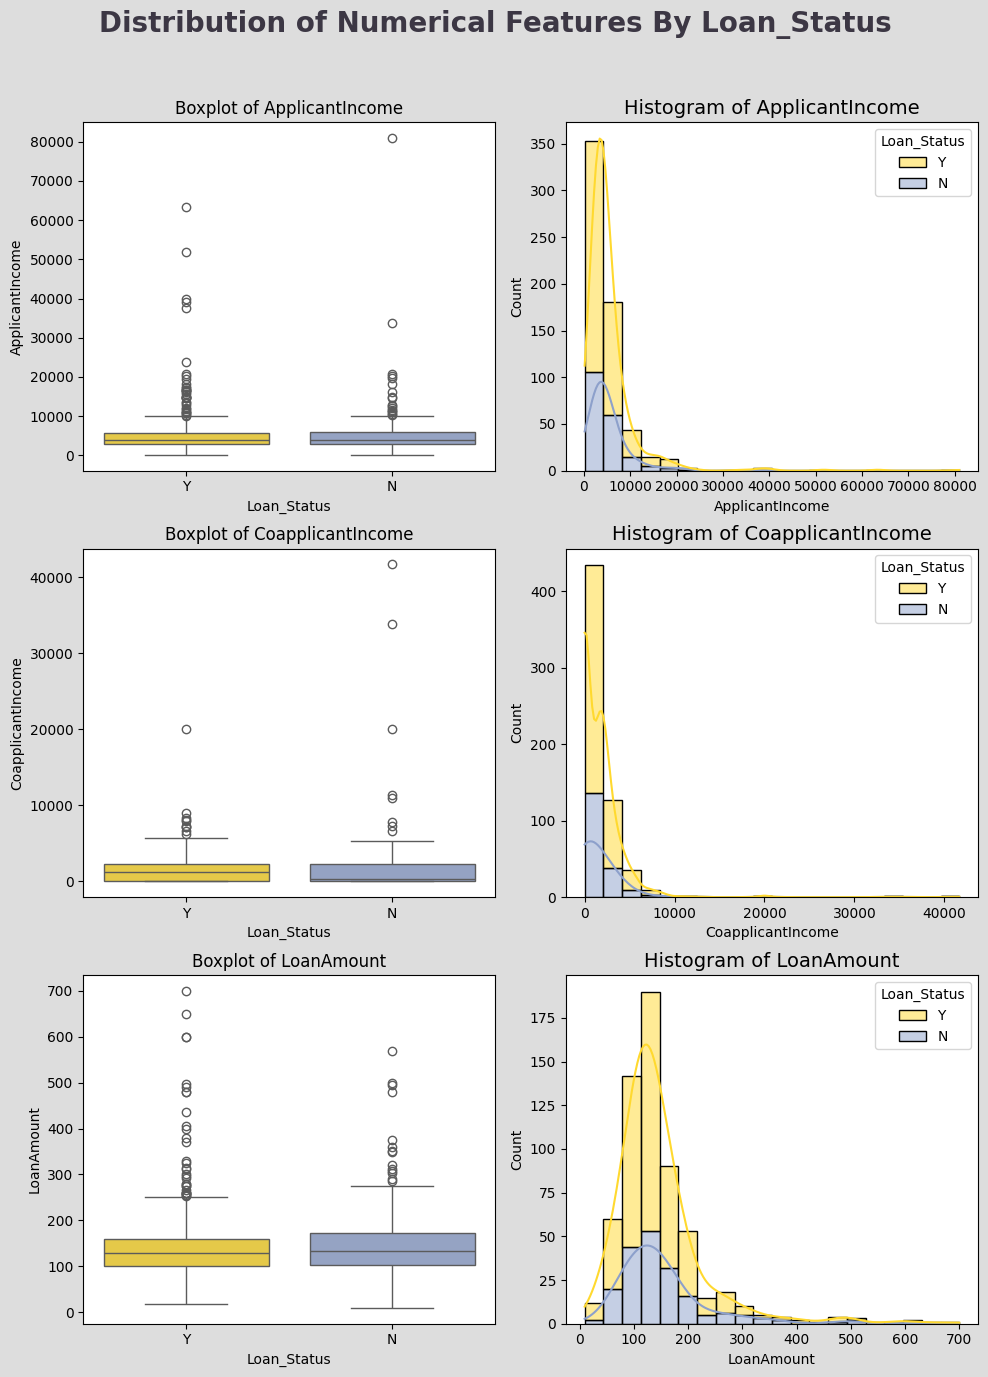

In [9]:
#clr1 = ['#1E90FF', '#DC143C']
 
fig, ax = plt.subplots(3, 2, figsize=(10,14))
fig.suptitle('Distribution of Numerical Features By Loan_Status', color='#3C3744',
             fontsize=20, fontweight='bold', ha='center')
fig.set_facecolor('#DDDDDD') 
for i, col in enumerate(numeric_features):   
    sns.boxplot(data=df, x='Loan_Status', y=col, palette="Set2_r", ax=ax[i,0])
    ax[i,0].set_title(f'Boxplot of {col}', fontsize=12)
    sns.histplot(data=df, x=col, hue='Loan_Status', bins=20, kde=True, 
                 multiple='stack', palette="Set2_r", ax=ax[i,1])
    ax[i,1].set_title(f'Histogram of {col}', fontsize=14)
fig.tight_layout()
fig.subplots_adjust(top=0.90)
# plt.savefig('images/multivariate_num.png')

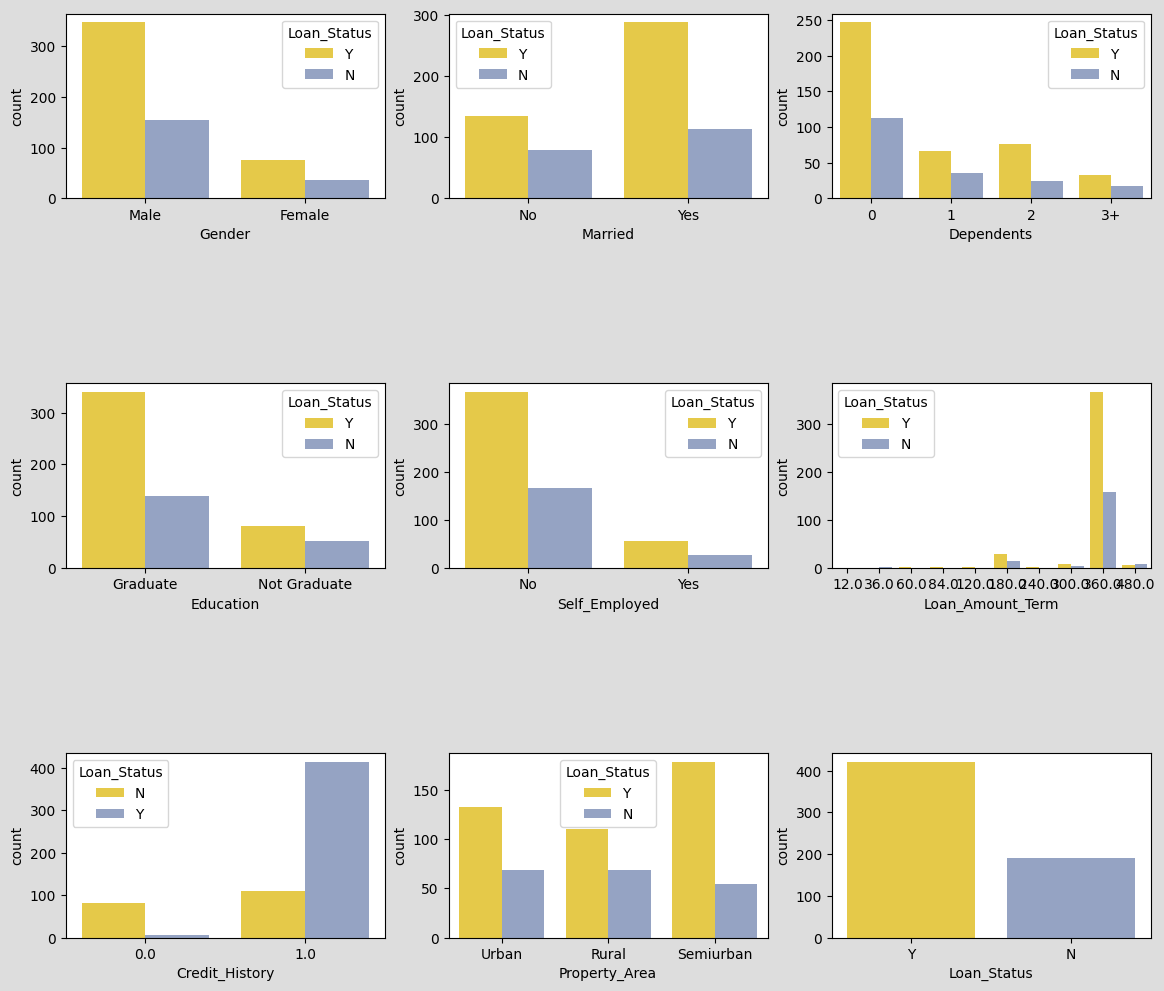

In [10]:
fig, ax = plt.subplots(3, 3, figsize=(14, 12))  
fig.set_facecolor('#DDDDDD')  

for index, cat_col in enumerate(categorical_features):
    row, col = index // 3, index % 3
    sns.countplot(x=cat_col, data=df, hue='Loan_Status', ax=ax[row, col],
                  palette="Set2_r")  # Use light colored palette

plt.subplots_adjust(hspace=1)
plt.show()
    
# save plot
# plt.savefig('./images/Univariate_Cat.png')

In [11]:
distinct_value_counts = df.nunique()
distinct_value_counts 


Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

Handling the missing values in the dataset

In [12]:
df.isnull().sum()


Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [13]:
# proportion of count data on categorical columns
for cat in categorical_features:
    print(df[cat].value_counts(normalize=True) * 100)
    print('---------------------------')

Gender
Male      81.758958
Female    18.241042
Name: proportion, dtype: float64
---------------------------
Married
Yes    65.309446
No     34.690554
Name: proportion, dtype: float64
---------------------------
Dependents
0     58.631922
1     16.612378
2     16.449511
3+     8.306189
Name: proportion, dtype: float64
---------------------------
Education
Graduate        78.175896
Not Graduate    21.824104
Name: proportion, dtype: float64
---------------------------
Self_Employed
No     86.644951
Yes    13.355049
Name: proportion, dtype: float64
---------------------------
Loan_Amount_Term
360.0    85.667752
180.0     7.166124
480.0     2.442997
300.0     2.117264
240.0     0.651466
84.0      0.651466
120.0     0.488599
60.0      0.325733
36.0      0.325733
12.0      0.162866
Name: proportion, dtype: float64
---------------------------
Credit_History
1.0    85.504886
0.0    14.495114
Name: proportion, dtype: float64
---------------------------
Property_Area
Semiurban    37.947883
Urban 

In [14]:
print(numeric_features)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


In [15]:
print(categorical_features)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']


In [16]:
df.head

<bound method NDFrame.head of      Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0      Male      No          0      Graduate            No             5849   
1      Male     Yes          1      Graduate            No             4583   
2      Male     Yes          0      Graduate           Yes             3000   
3      Male     Yes          0  Not Graduate            No             2583   
4      Male      No          0      Graduate            No             6000   
..      ...     ...        ...           ...           ...              ...   
609  Female      No          0      Graduate            No             2900   
610    Male     Yes         3+      Graduate            No             4106   
611    Male     Yes          1      Graduate            No             8072   
612    Male     Yes          2      Graduate            No             7583   
613  Female      No          0      Graduate           Yes             4583   

     CoapplicantIncom